# Avaliação da Explicabilidade com GradCAM

In [11]:
# Importações de libraries importantes
import sys
sys.path.append('../')
from neuroscan import modelo
from neuroscan import grad_cam
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [12]:
# Modelo NeuroscanSUS pretreinado
modelo = tf.keras.models.load_model("../neuroscan/modelos/modelo.h5")

In [13]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 400, 400, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 399, 399, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 198, 198, 16)      4112      
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 198, 198, 16)      0

In [14]:
gradcam = grad_cam.GradCAM(modelo, "conv2d_1")

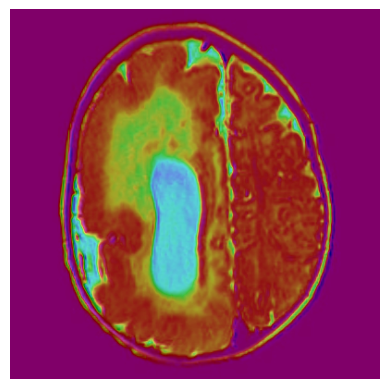

In [21]:
path = "../neuroscan/dados/Testing/glioma_tumor/image(49).jpg"
gradcam.faz_gradcam(path_da_imagem=path)

In [22]:
imagem = Image.open(path)
imagem.show()

In [23]:
imagem = np.array(imagem.resize((400, 400)))
imagem = np.expand_dims(imagem, axis=0)

In [24]:
np.argmax(modelo.predict(imagem), axis=-1)

1/1 [==============================] - 0s 80ms/step


array([0], dtype=int64)